In [ ]:
import pandas as pd
import numpy as np

print("--- Exemplo 1: Criação de DataFrame com Dados Agrícolas ---")
# Cenário: Análise de produção de culturas por região
data = {
    'cultura': np.random.choice(['Milho', 'Soja', 'Trigo', 'Café'], 100),
    'regiao': np.random.choice(['Norte', 'Sul', 'Leste', 'Oeste', 'Central'], 100),
    'tipo_solo': np.random.choice(['Arenoso', 'Argiloso', 'Humoso'], 100),
    'irrigacao': np.random.choice(['Gotejamento', 'Aspersão', 'Nenhuma'], 100),
    'producao_ton': np.random.normal(50, 15, 100), # Produção em toneladas
    'area_hectare': np.random.uniform(10, 100, 100), # Área em hectares
    'umidade_solo': np.random.uniform(20, 80, 100), # Umidade do solo em %
    'temperatura_media': np.random.normal(25, 5, 100) # Temperatura média em °C
}
df = pd.DataFrame(data)
print("DataFrame de exemplo (primeiras 5 linhas):")
print(df.head())
print("\n" + "-"*70 + "\n")

print("--- Exemplo 2: GroupBy Básico - Média de Produção por Região ---")
# Agrupando por região e calculando a média de produção
producao_por_regiao = df.groupby('regiao')['producao_ton'].mean()
print("Média de produção por região:")
print(producao_por_regiao)
print("\n" + "-"*70 + "\n")

print("--- Exemplo 3: Estatísticas Descritivas com GroupBy ---")
# Média de produção por tipo de solo
media_producao_solo = df.groupby('tipo_solo')['producao_ton'].mean()
print("Média de produção por tipo de solo:")
print(media_producao_solo)

# Desvio padrão de umidade por tipo de irrigação
desvio_padrao_umidade_irrigacao = df.groupby('irrigacao')['umidade_solo'].std()
print("\nDesvio padrão de umidade por tipo de irrigação:")
print(desvio_padrao_umidade_irrigacao)
print("\n" + "-"*70 + "\n")

print("--- Exemplo 4: Múltiplos Agrupamentos ---")
# Produção média por cultura e tipo de solo
producao_cultura_solo = df.groupby(['cultura', 'tipo_solo'])['producao_ton'].mean()
print("Produção média por cultura e tipo de solo:")
print(producao_cultura_solo)
print("\n" + "-"*70 + "\n")

print("--- Exemplo 5: Agregação Personalizada com .agg() ---")
# Aplicando diferentes funções a diferentes colunas
agg_personalizada = df.groupby('cultura').agg({
    'producao_ton': ['mean', 'std', 'min', 'max'],
    'area_hectare': 'sum',
    'umidade_solo': ['mean', 'median'],
    'temperatura_media': 'mean'
})
print("Resultado da agregação personalizada por cultura (primeiras 5 linhas):")
print(agg_personalizada.head())

# Exemplo de função personalizada para produtividade
def produtividade(x):
    if x['area_hectare'].sum() == 0:
        return 0
    return x['producao_ton'].sum() / x['area_hectare'].sum()

produtividade_por_cultura = df.groupby('cultura').apply(produtividade)
print("\nProdutividade calculada por cultura (função personalizada):")
print(produtividade_por_cultura)
print("\n" + "-"*70 + "\n")

print("--- Exemplo 6: Visualização (exemplo básico com Pandas) ---")
# Para visualização, geralmente se usaria bibliotecas como Matplotlib ou Seaborn.
# Aqui, um exemplo simples de como o Pandas pode gerar um plot diretamente.

# Calculando a média de produção por cultura
producao_por_cultura_plot = df.groupby('cultura')['producao_ton'].mean()

# O comando abaixo geraria um gráfico se executado em um ambiente interativo (ex: Jupyter Notebook)
# producao_por_cultura_plot.plot(kind='bar', title='Média de Produção por Cultura')
# import matplotlib.pyplot as plt
# plt.ylabel('Produção (ton)')
# plt.xlabel('Cultura')
# plt.show()

print("Para visualização, o Pandas pode gerar gráficos diretamente (requer Matplotlib/Seaborn para exibição).")
print("Exemplo: df.groupby('cultura')['producao_ton'].mean().plot(kind='bar')")
print("\n" + "-"*70 + "\n")

--- Exemplo 1: Criação de DataFrame com Dados Agrícolas ---
DataFrame de exemplo (primeiras 5 linhas):
  cultura   regiao tipo_solo    irrigacao  producao_ton  area_hectare  \
0    Café      Sul    Humoso      Nenhuma     65.457765     45.876923   
1   Milho    Norte  Argiloso      Nenhuma     60.800631     48.667111   
2    Soja  Central    Humoso      Nenhuma     52.179398     66.162289   
3    Soja    Oeste  Argiloso     Aspersão     51.585641     65.545372   
4   Milho    Leste    Humoso  Gotejamento     43.794079     81.504915   

   umidade_solo  temperatura_media  
0     59.627625          14.644032  
1     25.607883          25.730005  
2     79.558037          25.962491  
3     69.835403          31.313367  
4     47.778893          26.025860  

----------------------------------------------------------------------

--- Exemplo 2: GroupBy Básico - Média de Produção por Região ---
Média de produção por região:
regiao
Central    53.430417
Leste      45.663942
Norte      54.17947

C:\Users\Pichau\AppData\Local\Temp\ipykernel_30908\630249131.py:64: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  produtividade_por_cultura = df.groupby('cultura').apply(produtividade)


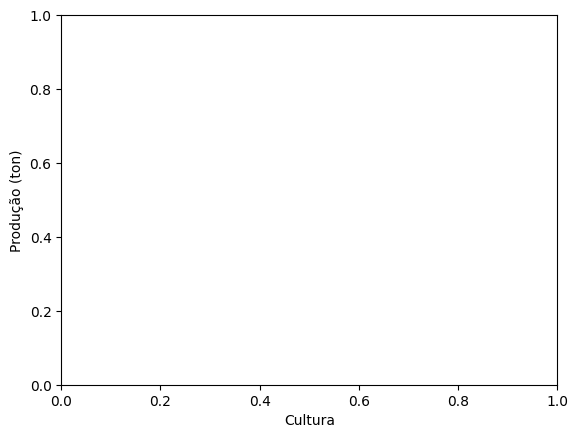

In [2]:

# O comando abaixo geraria um gráfico se executado em um ambiente interativo (ex: Jupyter Notebook)
# producao_por_cultura_plot.plot(kind='bar', title='Média de Produção por Cultura')
import matplotlib.pyplot as plt
plt.ylabel('Produção (ton)')
plt.xlabel('Cultura')
plt.show()